,0,1,2,3,4
0,0.071841,0.855352,-0.305597,0.028253,1.826895
1,0.139521,-0.423507,0.461059,-0.447400,-0.034988
2,1.626311,-0.257622,-0.697520,1.413219,1.086292
3,-1.183233,-0.826343,0.073047,-0.639690,-0.503273
4,-0.783365,-0.861232,0.951448,-0.117306,0.680597


,0
0,63.320498
1,-23.426394
2,11.982771
3,-102.883304
4,-49.373475


Форма x: (387, 5)
Форма y: (387, 1)
Статистика по x:


,0,1,2,3,4
count,387.000000,387.000000,387.000000,387.000000,387.000000
mean,0.080231,-0.023369,-0.094194,0.052474,0.067604
std,1.006557,1.008319,1.013547,0.996496,0.964922
min,-2.721942,-3.526587,-2.952847,-3.468134,-2.376103
25%,-0.505726,-0.606748,-0.731435,-0.594637,-0.582224
50%,0.064065,-0.006496,-0.123261,0.022809,-0.027389
75%,0.746176,0.602911,0.534841,0.750923,0.665682
max,3.077357,2.779463,2.959742,2.943178,3.626974


Статистика по y:


,0
count,387.000000
mean,-2.228924
std,109.762609
min,-317.372654
25%,-81.782754
50%,0.526462
75%,69.249485
max,266.532640


Коэффициенты парной регрессии: [[95.52010745]]
R2 парной регрессии: 0.7699743283650629


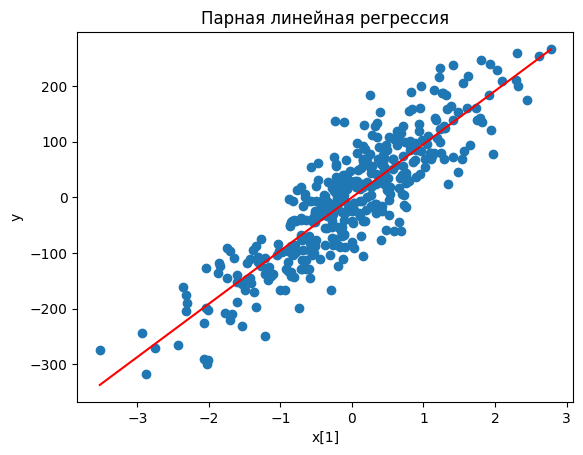

Коэффициенты множественной регрессии: [[15.79537523 93.21521093 37.19410687 31.19129121 -0.23773114]]
R2 множественной регрессии: 0.9922198026415868


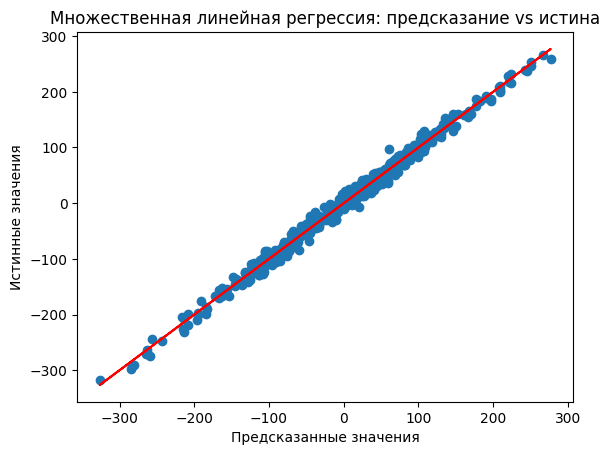

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.read_csv("../ML1.2 multivariate/data/0_x.csv", header=None)
y = pd.read_csv("../ML1.2 multivariate/data/0_y.csv", header=None)

display(x.head())
display(y.head())

print("Форма x:", x.shape)
print("Форма y:", y.shape)
print("Статистика по x:")
display(x.describe())
print("Статистика по y:")
display(y.describe())

from sklearn.linear_model import LinearRegression

# Парная регрессия по одному признаку
binary = LinearRegression()
binary.fit(x[[1]], y)
print("Коэффициенты парной регрессии:", binary.coef_) # показывает зависимость y от x[1]
print("R2 парной регрессии:", binary.score(x[[1]], y)) # точность модели

plt.scatter(x[1], y)
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.plot(xx, binary.predict(xx), c='r')
plt.xlabel("x[1]")
plt.ylabel("y")
plt.title("Парная линейная регрессия")
plt.show()

# Множественная линейная регрессия
multiple = LinearRegression()
multiple.fit(x, y)
print("Коэффициенты множественной регрессии:", multiple.coef_)
print("R2 множественной регрессии:", multiple.score(x, y))

yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')
plt.xlabel("Предсказанные значения")
plt.ylabel("Истинные значения")
plt.title("Множественная линейная регрессия: предсказание vs истина")
plt.show()


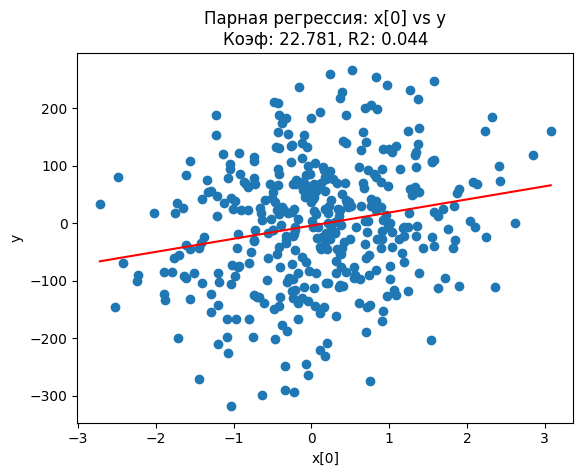

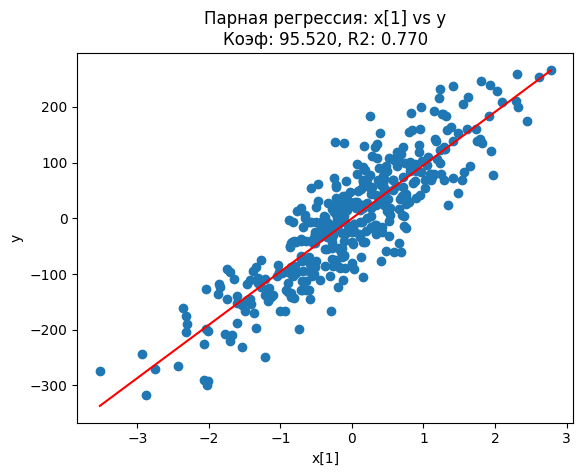

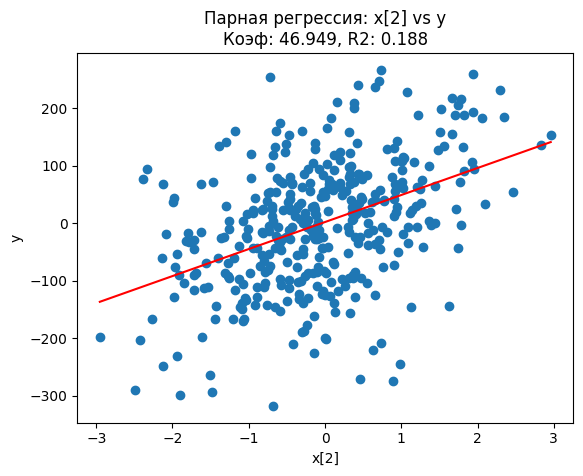

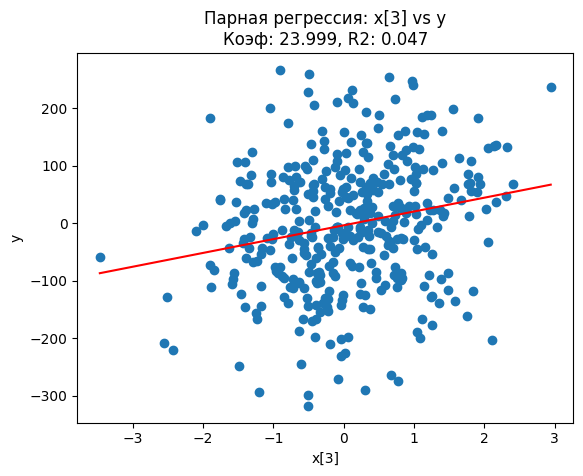

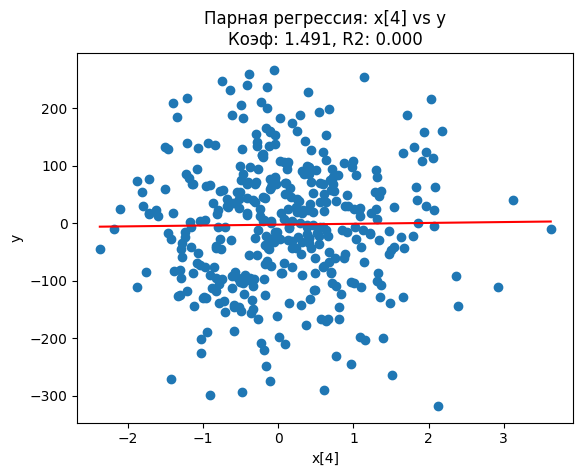

,Признак,Коэффициент,R2
0,0,22.781113,0.043643
1,1,95.520107,0.769974
2,2,46.948976,0.187945
3,3,23.998824,0.047470
4,4,1.490820,0.000172


In [3]:
r2_scores = []
coefs = []

for col in x.columns:
    model = LinearRegression()
    model.fit(x[[col]], y)
    r2 = model.score(x[[col]], y)
    coef = model.coef_[0][0]
    r2_scores.append(r2)
    coefs.append(coef)
    plt.figure()
    plt.scatter(x[col], y)
    xx = np.linspace(x[col].min(), x[col].max(), 100).reshape(-1, 1)
    plt.plot(xx, model.predict(xx), c='r')
    plt.xlabel(f"x[{col}]")
    plt.ylabel("y")
    plt.title(f"Парная регрессия: x[{col}] vs y\nКоэф: {coef:.3f}, R2: {r2:.3f}")
    plt.show()

summary = pd.DataFrame({
    "Признак": x.columns,
    "Коэффициент": coefs,
    "R2": r2_scores
})
display(summary)

### Задание 2.

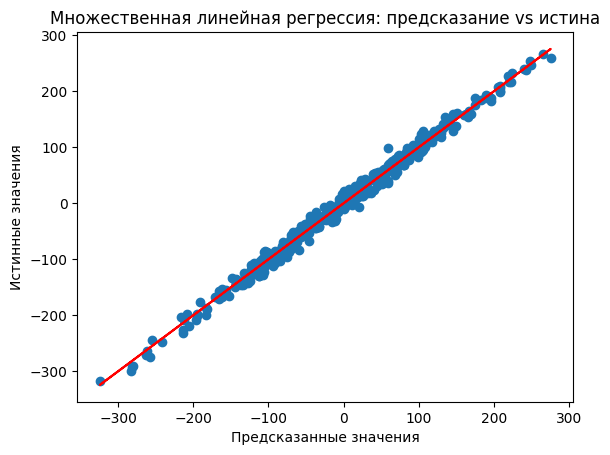

In [ ]:
class Model(object):
    """Модель множественной линейной регрессии"""
    def __init__(self):
        self.b = None

    def _to_matrix(self, X):
        # входные данные в numpy массив
        if isinstance(X, pd.DataFrame):
            return X.values
        elif isinstance(X, pd.Series):
            return X.values.reshape(-1, 1)
        else:
            return np.array(X)

    def predict(self, X):
        X = self._to_matrix(X)
        # Добавляем столбец единиц что бы модель также предсказывала свободный член
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_ext @ self.b

    def error(self, X, Y):
        X = self._to_matrix(X)
        Y = self._to_matrix(Y)
        pred = self.predict(X)
        return np.mean((pred - Y) ** 2) / 2

    def fit(self, X, Y, alpha=0.001, accuracy=1e-6, max_steps=5000):
        X = self._to_matrix(X)
        Y = self._to_matrix(Y)
        X_ext = np.hstack([np.ones((X.shape[0], 1)), X])
        n_samples, n_features = X_ext.shape
        self.b = np.zeros((n_features, 1))
        errors = []
        for step in range(max_steps):
            pred = X_ext @ self.b
            grad = X_ext.T @ (pred - Y) / n_samples
            self.b -= alpha * grad
            new_err = np.mean((pred - Y) ** 2) / 2
            errors.append(new_err)
            if step > 100 and abs(errors[-1] - errors[-2]) < accuracy:
                print(f"Сошлось на шаге {step+1}")
                break
        return errors

    def plot(self, X, Y):
        X = self._to_matrix(X)
        Y = self._to_matrix(Y)
        if X.shape[1] == 1:
            plt.scatter(X, Y)
            X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            Y_line = self.predict(X_line)
            plt.plot(X_line, Y_line, 'r')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Множественная линейная регрессия (1 признак)')
            plt.show()
        else:
            # Для многомерного случая строим предсказание/истина
            Y_pred = self.predict(X)
            plt.scatter(Y_pred, Y)
            plt.plot(Y_pred, Y_pred, 'r')
            plt.xlabel('Предсказанные значения')
            plt.ylabel('Истинные значения')
            plt.show()


model = Model()
model.fit(x, y)
model.plot(x, y)

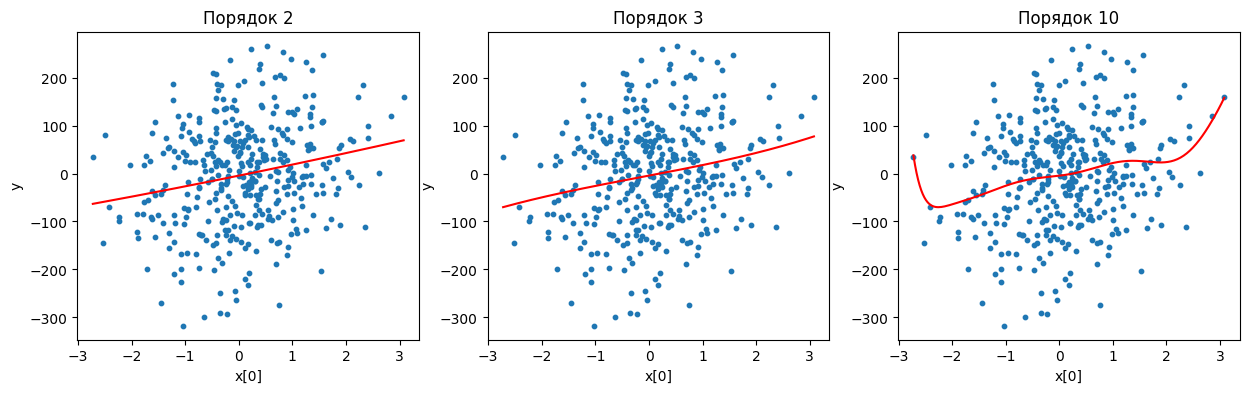

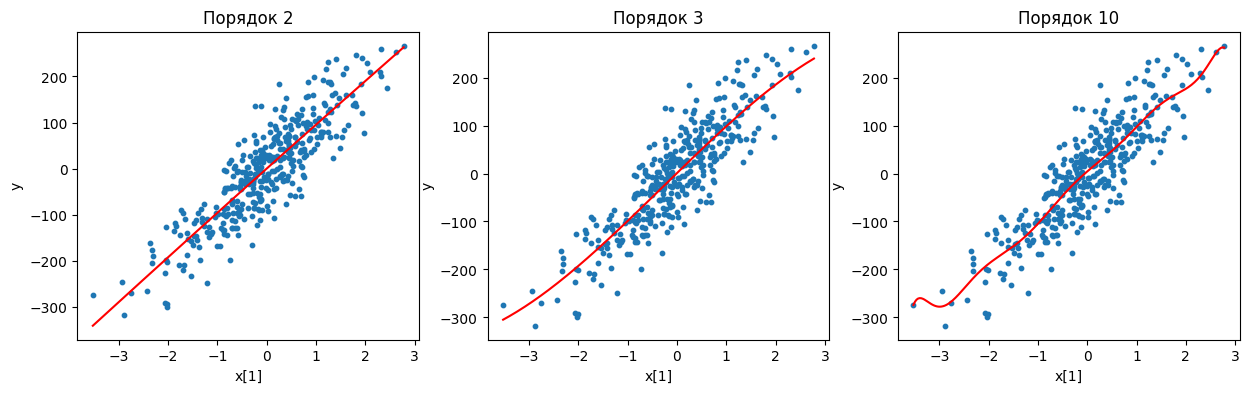

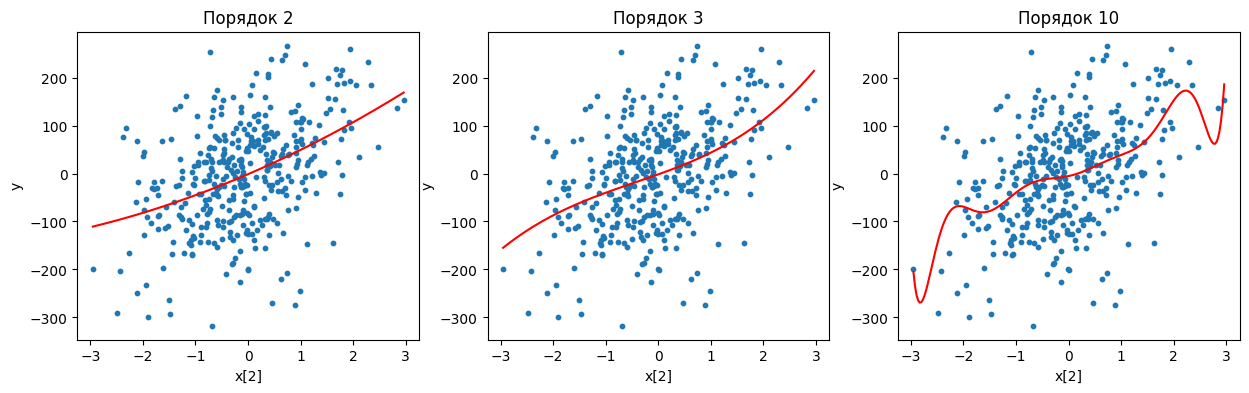

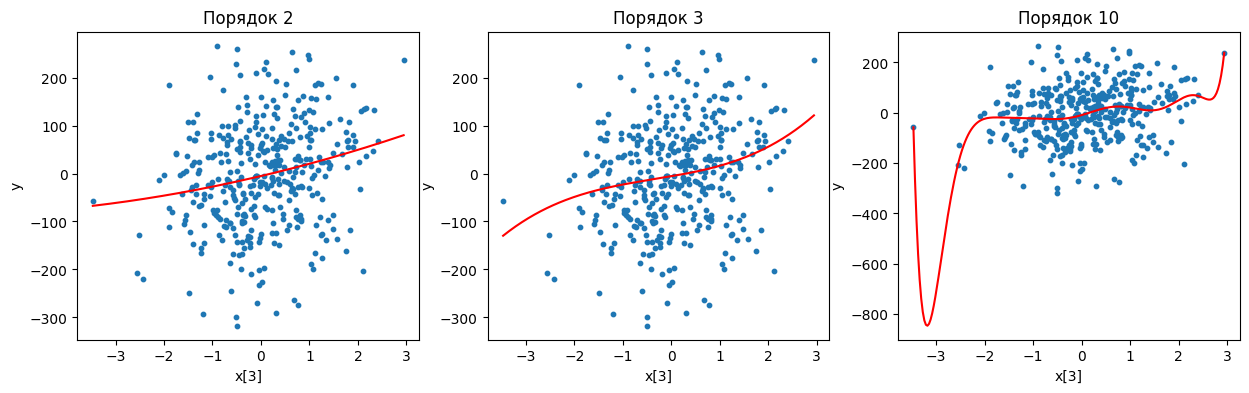

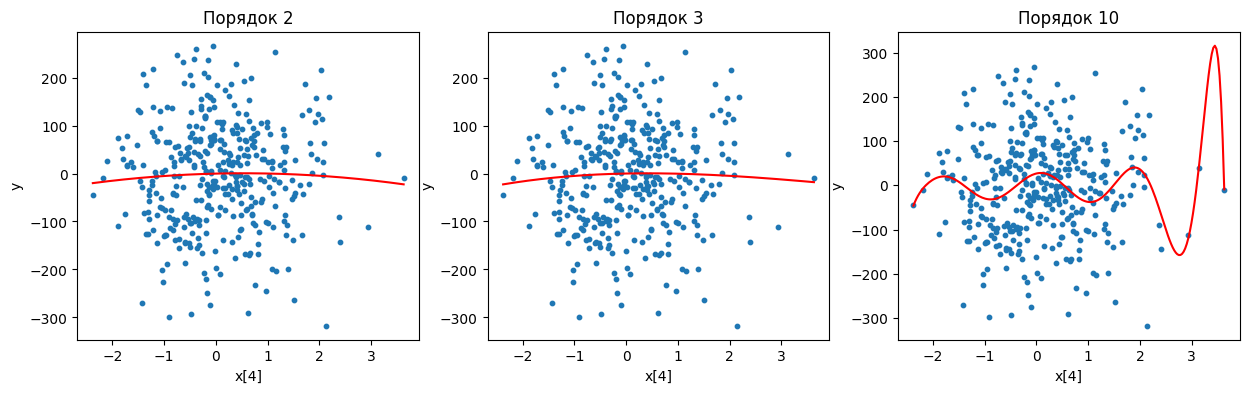

R2                            MAE                        \
Порядок        2         3         10         2          3          10   
Признак                                                                  
0        0.043672  0.043765  0.050356  85.778988  85.684404  84.854224   
1        0.769994  0.771118  0.772677  42.132303  42.061248  41.690871   
2        0.190008  0.192802  0.204409  77.458415  77.570200  76.815422   
3        0.047943  0.050312  0.072667  83.446884  83.444329  82.134261   
4        0.001049  0.001065  0.045053  87.232040  87.223572  84.796000   

                  MSE                                 Время            \
Порядок            2             3             10        2         3    
Признак                                                                 
0        11491.909255  11490.787323  11411.586520  0.002935  0.001353   
1         2763.909753   2750.401156   2731.672893  0.002751  0.000958   
2         9733.431563   9699.859735   9560.372197  0.001277  0.001417   
3        11440.588266  11412.119234  11143.475913  0.001437  0.001531   
4        12004.093016  12003.905964  11475.314939  0.001339  0.001144   

                   
Порядок        10  
Признак            
0        0.001489  
1        0.001958  
2        0.001369  
3        0.001713  
4        0.001719

Время обучения и качество модели увеличиваются с ростом степени полинома. Высокие степени дают лучший R2, но могут переобучаться и требуют больше времени. MAE и MSE также уменьшаются, но не всегда существенно. Для практики обычно достаточно 2-3 порядка.


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

orders = [2, 3, 10]
results = []

for col in x.columns:
    plt.figure(figsize=(15, 4))
    for i, order in enumerate(orders, 1):
        poly = PolynomialFeatures(order)
        X_poly = poly.fit_transform(x[[col]]) # создаёт таблицу с признаками x^0, x^1, x^2...


        model = LinearRegression()
        start = time.time()
        model.fit(X_poly, y)
        elapsed = time.time() - start
        y_pred = model.predict(X_poly)
        r2 = model.score(X_poly, y)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        results.append({
            'Признак': col,
            'Порядок': order,
            'R2': r2,
            'MAE': mae,
            'MSE': mse,
            'Время': elapsed
        })

        plt.subplot(1, len(orders), i)
        plt.scatter(x[col], y, s=10)
        xx = np.linspace(x[col].min(), x[col].max(), 200).reshape(-1, 1)
        yy = model.predict(poly.transform(xx))
        plt.plot(xx, yy, 'r')
        plt.xlabel(f"x[{col}]")
        plt.ylabel("y")
        plt.title(f"Порядок {order}")
    plt.show()

summary = pd.DataFrame(results)
display(summary.pivot(index='Признак', columns='Порядок', values=['R2', 'MAE', 'MSE', 'Время']))

print("Время обучения и качество модели увеличиваются с ростом степени полинома. Высокие степени дают лучший R2, но могут переобучаться и требуют больше времени. MAE и MSE также уменьшаются, но не всегда существенно. Для практики обычно достаточно 2-3 порядка.")